In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path_2018 = '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/train'
dataset_path_2020 = '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2020_processed/train'

csv_files_2018 = [f for f in os.listdir(dataset_path_2018) if f.endswith('.csv')]
csv_files_2020 = [f for f in os.listdir(dataset_path_2020) if f.endswith('.csv')]
csv_files = csv_files_2018 + csv_files_2020
csv_files.sort()
csv_files

['540-ws-training_processed.csv',
 '544-ws-training_processed.csv',
 '552-ws-training_processed.csv',
 '559-ws-training_processed.csv',
 '563-ws-training_processed.csv',
 '567-ws-training_processed.csv',
 '570-ws-training_processed.csv',
 '575-ws-training_processed.csv',
 '584-ws-training_processed.csv',
 '588-ws-training_processed.csv',
 '591-ws-training_processed.csv',
 '596-ws-training_processed.csv']

In [3]:
sample_file = '540-ws-training_processed.csv'
data = pd.read_csv(os.path.join(dataset_path_2020, sample_file))
data.head()

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
0,6.035755e+06,0.0,76.0,80.0,NaN,NaN,0.337214,NaN,NaN
1,6.035756e+06,0.0,72.0,NaN,NaN,NaN,0.317671,NaN,NaN
2,6.035757e+06,0.0,68.0,NaN,NaN,NaN,0.342821,NaN,NaN
3,6.035758e+06,0.0,65.0,NaN,NaN,NaN,0.359941,NaN,NaN
4,6.035759e+06,0.0,63.0,NaN,NaN,NaN,0.365833,NaN,NaN


In [4]:
# Set the first timestamp to 0 and increment by 5 minutes for each row
data['minutes_elapsed'] = np.arange(0, len(data) * 5, 5) 
data['days_elapsed'] = data['minutes_elapsed'] / 1440
data.head()


,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus,minutes_elapsed,days_elapsed
0,6.035755e+06,0.0,76.0,80.0,NaN,NaN,0.337214,NaN,NaN,0,0.000000
1,6.035756e+06,0.0,72.0,NaN,NaN,NaN,0.317671,NaN,NaN,5,0.003472
2,6.035757e+06,0.0,68.0,NaN,NaN,NaN,0.342821,NaN,NaN,10,0.006944
3,6.035758e+06,0.0,65.0,NaN,NaN,NaN,0.359941,NaN,NaN,15,0.010417
4,6.035759e+06,0.0,63.0,NaN,NaN,NaN,0.365833,NaN,NaN,20,0.013889


In [5]:
present_data = data[data['missing_cbg'] == 0]
print(f"Number of rows with present CBG values: {len(present_data)}")
present_data.head()

Number of rows with present CBG values: 11946


,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus,minutes_elapsed,days_elapsed
0,6.035755e+06,0.0,76.0,80.0,NaN,NaN,0.337214,NaN,NaN,0,0.000000
1,6.035756e+06,0.0,72.0,NaN,NaN,NaN,0.317671,NaN,NaN,5,0.003472
2,6.035757e+06,0.0,68.0,NaN,NaN,NaN,0.342821,NaN,NaN,10,0.006944
3,6.035758e+06,0.0,65.0,NaN,NaN,NaN,0.359941,NaN,NaN,15,0.010417
4,6.035759e+06,0.0,63.0,NaN,NaN,NaN,0.365833,NaN,NaN,20,0.013889


In [6]:
missing_data = data[data['missing_cbg'] == 1]
print(f"Number of rows with missing CBG values: {len(missing_data)}")
missing_data.head()

Number of rows with missing CBG values: 1163


,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus,minutes_elapsed,days_elapsed
768,6.036523e+06,1.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,3840,2.666667
769,6.036524e+06,1.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,3845,2.670139
770,6.036525e+06,1.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,3850,2.673611
771,6.036526e+06,1.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,3855,2.677083
772,6.036527e+06,1.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,3860,2.680556


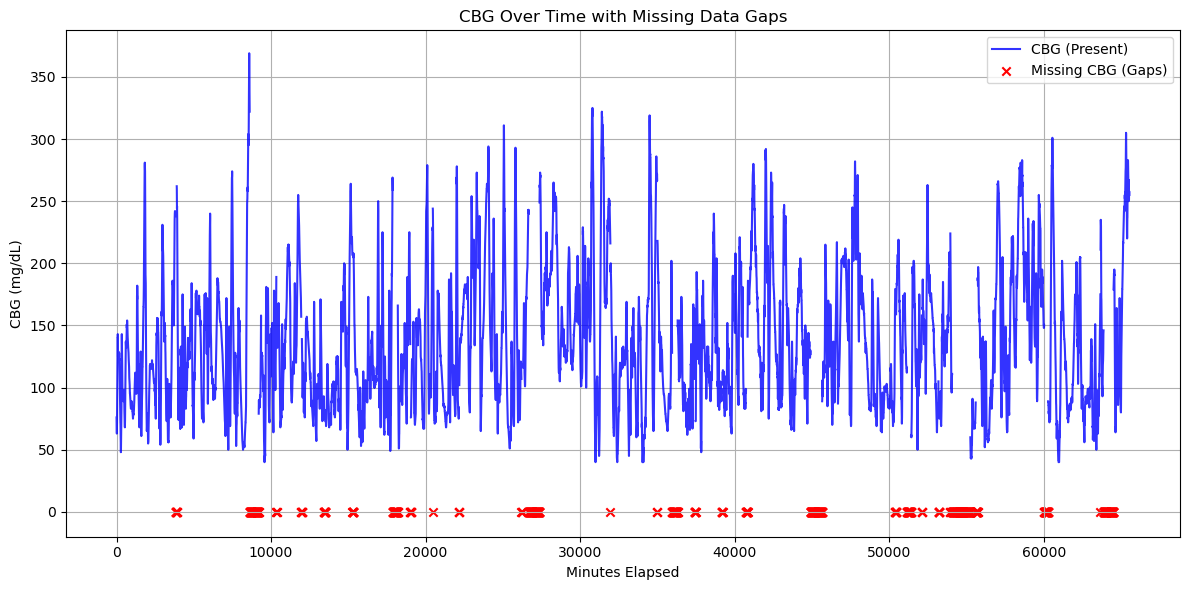

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['minutes_elapsed'], data['cbg'], color='blue', label='CBG (Present)', alpha=0.8)
plt.scatter(missing_data['minutes_elapsed'], np.full(len(missing_data), 0), color='red', label='Missing CBG (Gaps)', marker='x')
plt.title('CBG Over Time with Missing Data Gaps')
plt.xlabel('Minutes Elapsed')
plt.ylabel('CBG (mg/dL)')
plt.ylim(bottom=-20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

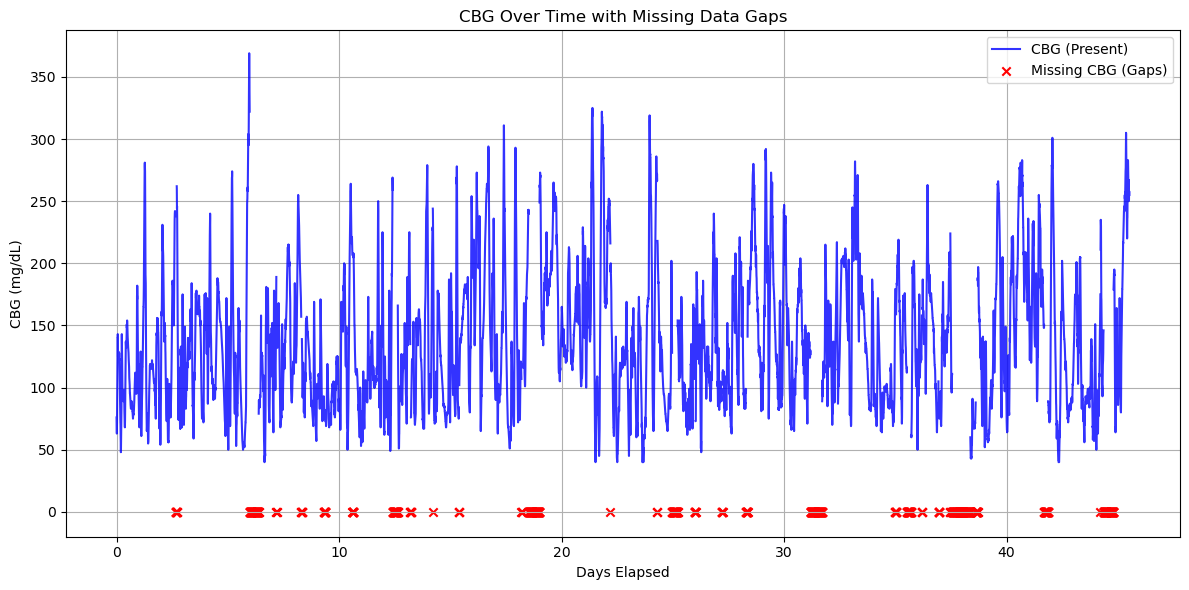

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['days_elapsed'], data['cbg'], color='blue', label='CBG (Present)', alpha=0.8)
plt.scatter(missing_data['days_elapsed'], np.full(len(missing_data), 0), color='red', label='Missing CBG (Gaps)', marker='x')
plt.title('CBG Over Time with Missing Data Gaps')
plt.xlabel('Days Elapsed')
plt.ylabel('CBG (mg/dL)')
plt.ylim(bottom=-20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
def plot_training_data(csv_files, dataset_path, year):
    for csv_file in csv_files:
        data = pd.read_csv(os.path.join(dataset_path, csv_file))
        data['minutes_elapsed'] = np.arange(0, len(data) * 5, 5)
        data['days_elapsed'] = data['minutes_elapsed'] / 1440
        present_data = data[data['missing_cbg'] == 0]
        missing_data = data[data['missing_cbg'] == 1]
        plt.figure(figsize=(12, 6))
        plt.plot(data['days_elapsed'], data['cbg'], color='blue', label='CBG (Present)', alpha=0.8)
        plt.scatter(missing_data['days_elapsed'], np.full(len(missing_data), 0), color='red', label='Missing CBG (Gaps)', marker='x')
        plt.title(f'CBG Over Time {csv_file}')
        plt.xlabel('Days Elapsed')
        plt.ylabel('CBG (mg/dL)')
        plt.ylim(bottom=-20)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Plotting 2018 Training Files...


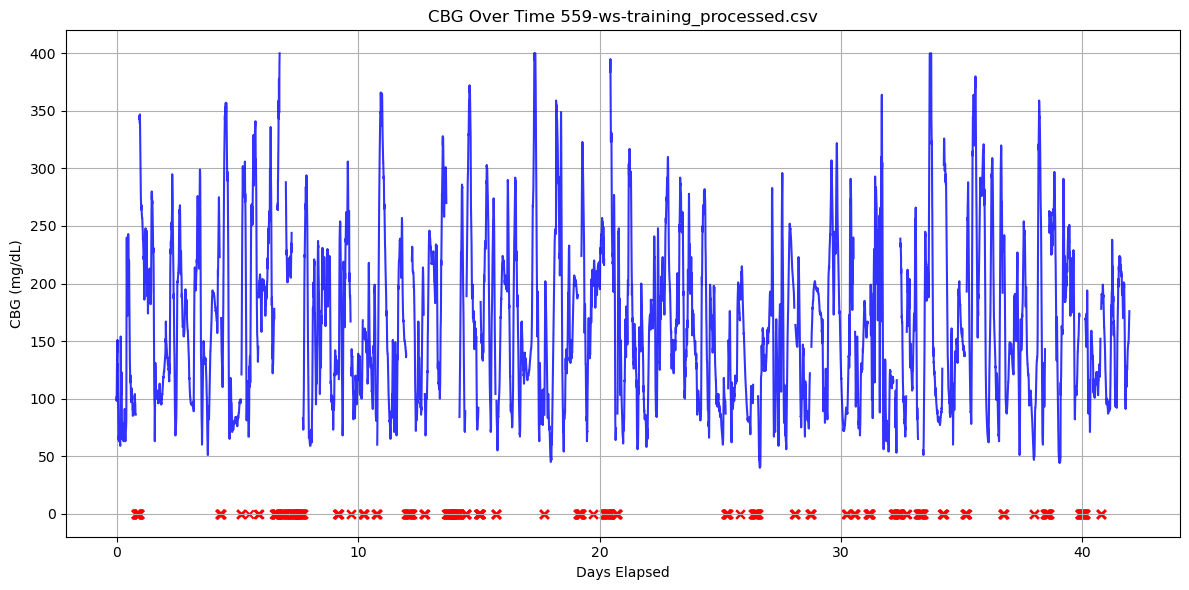

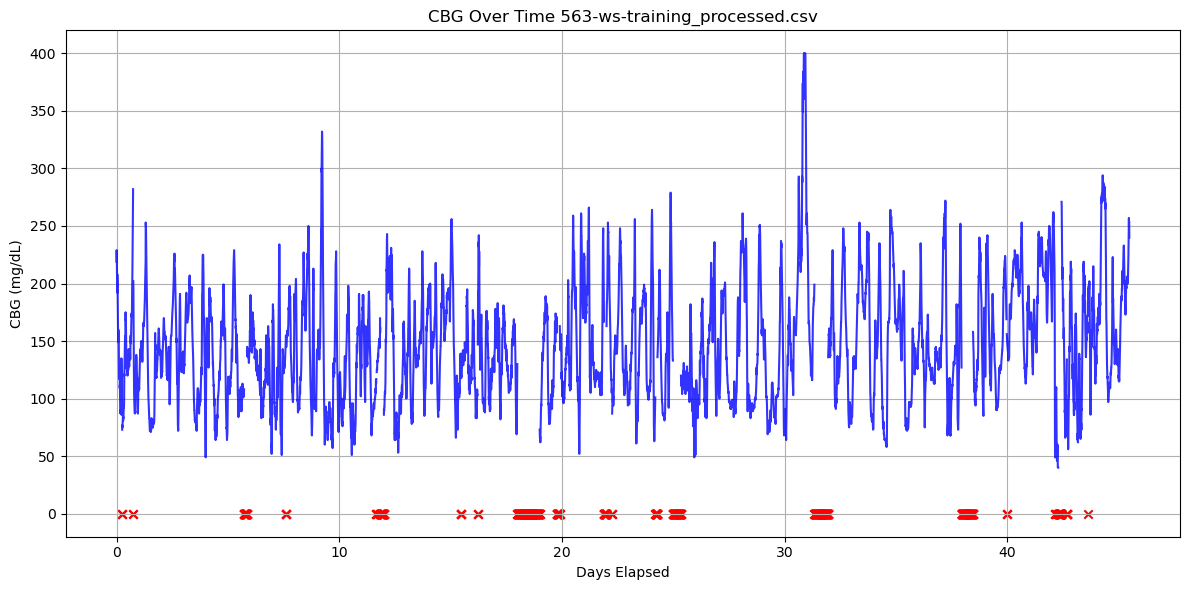

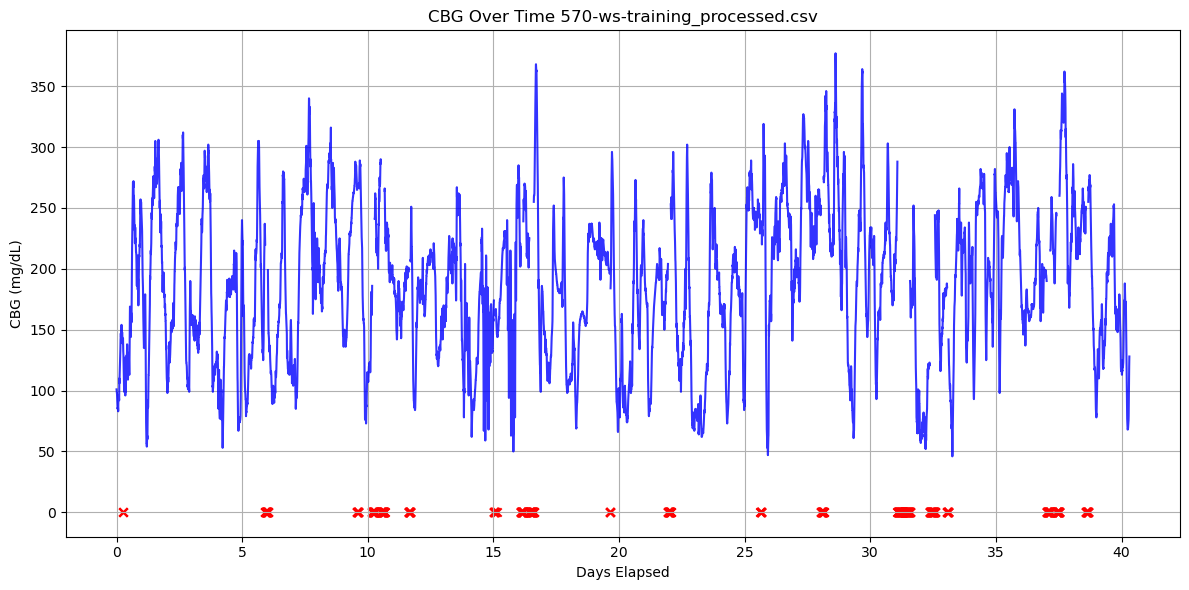

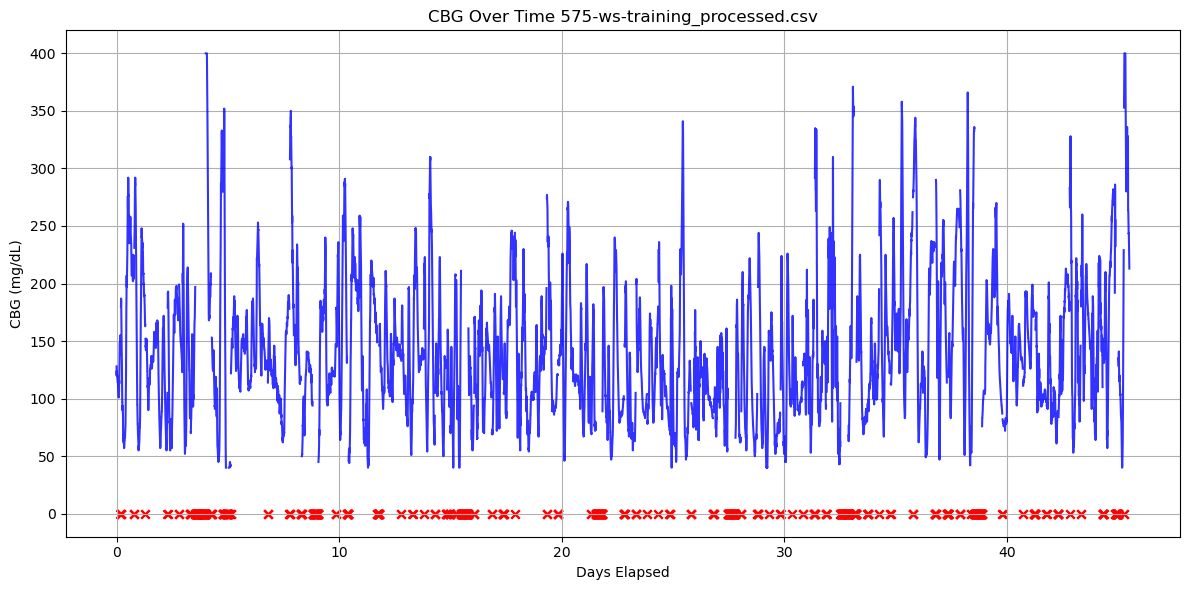

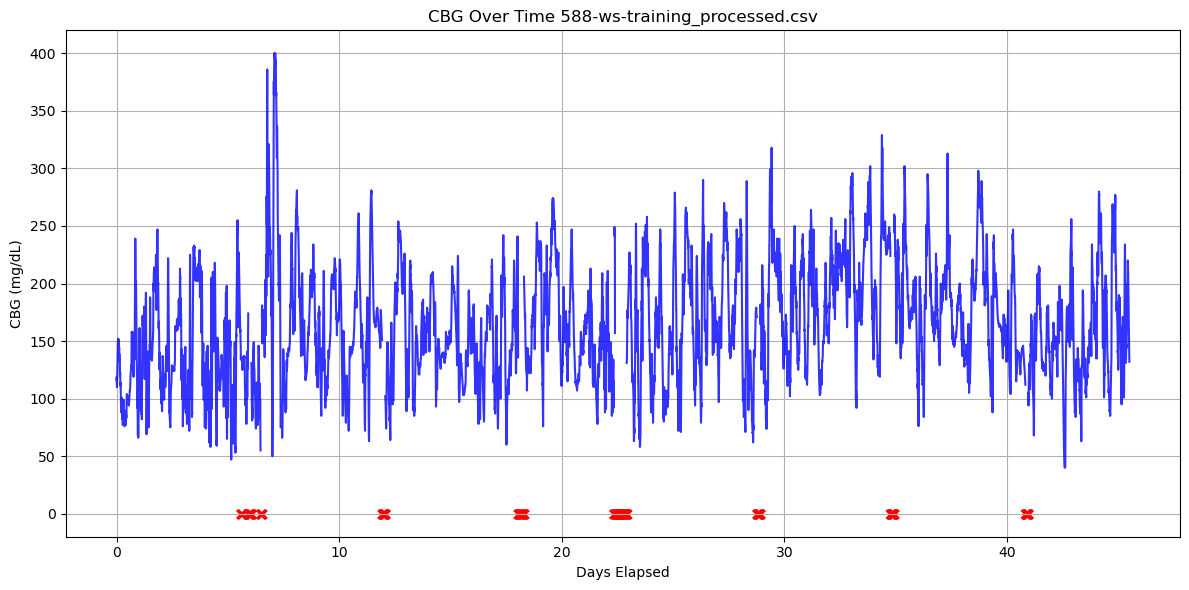

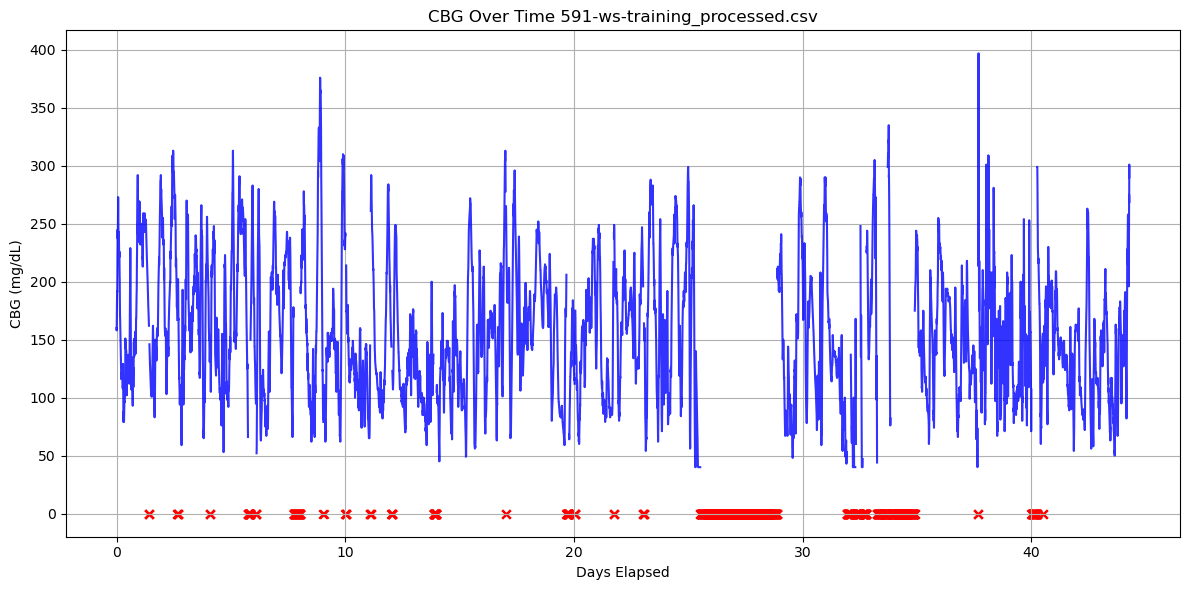

In [10]:
csv_files_2018.sort()
print("Plotting 2018 Training Files...")
plot_training_data(csv_files_2018, dataset_path_2018, year="2018")

Plotting 2020 Training Files...


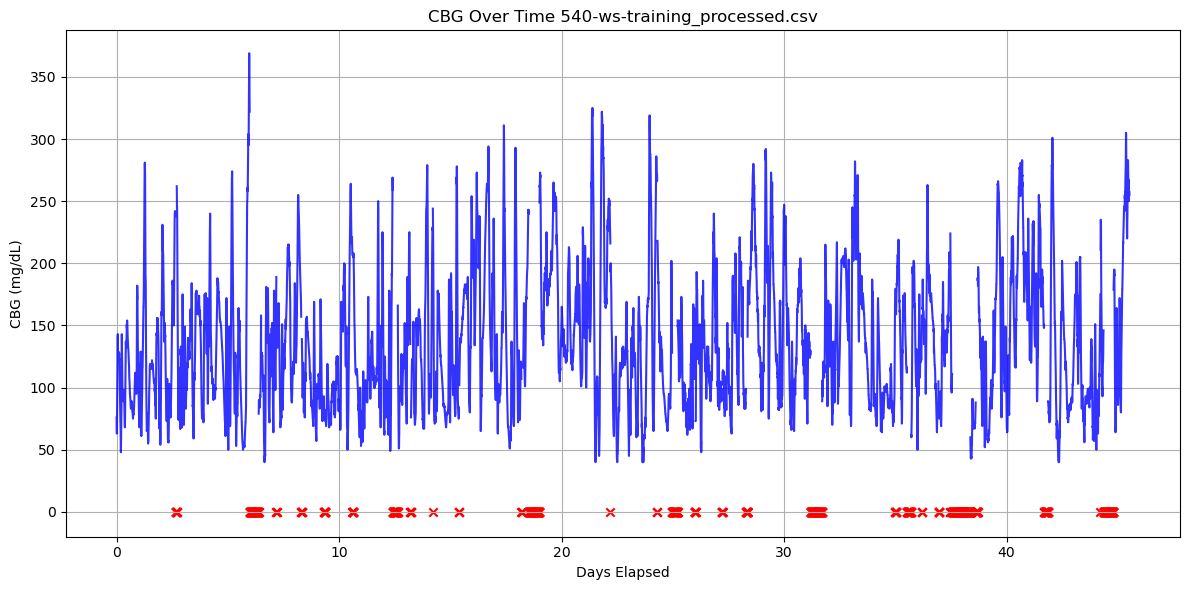

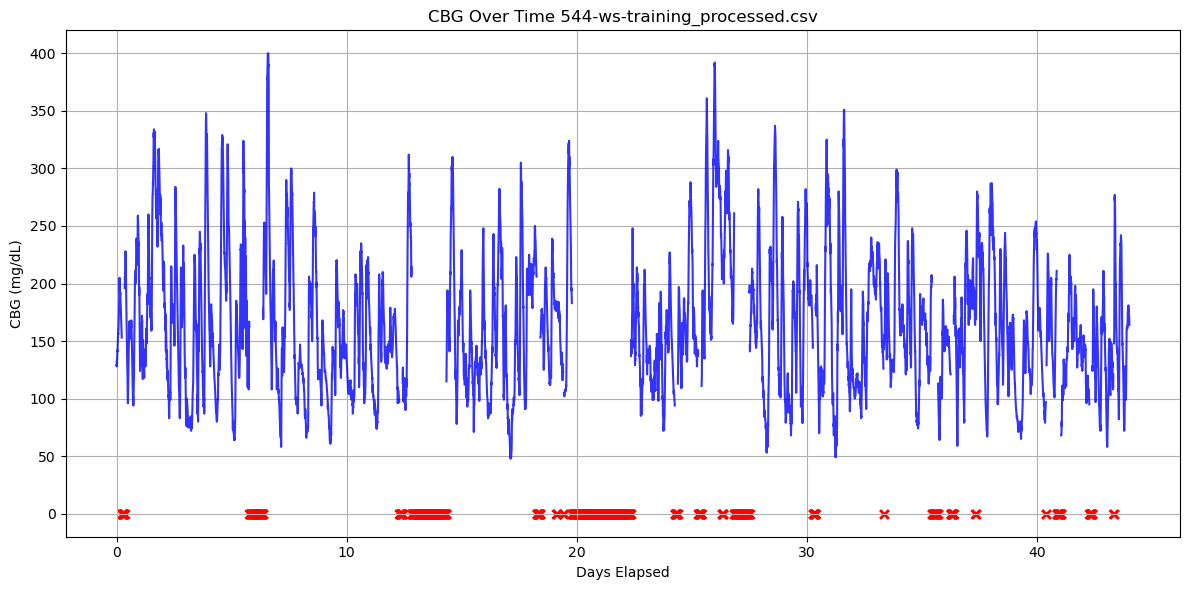

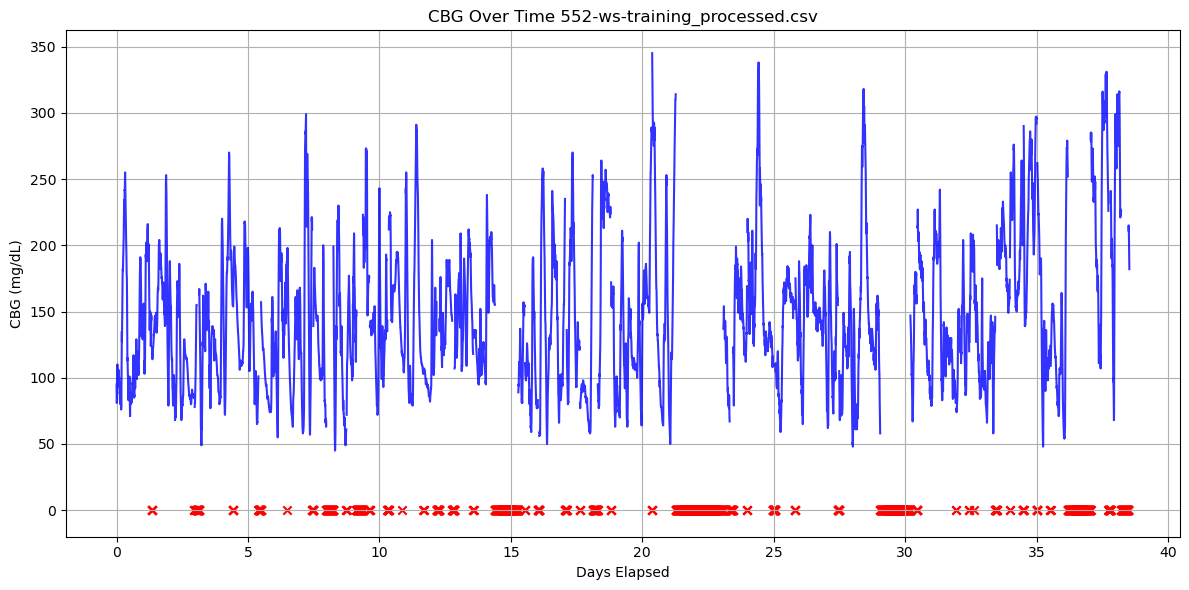

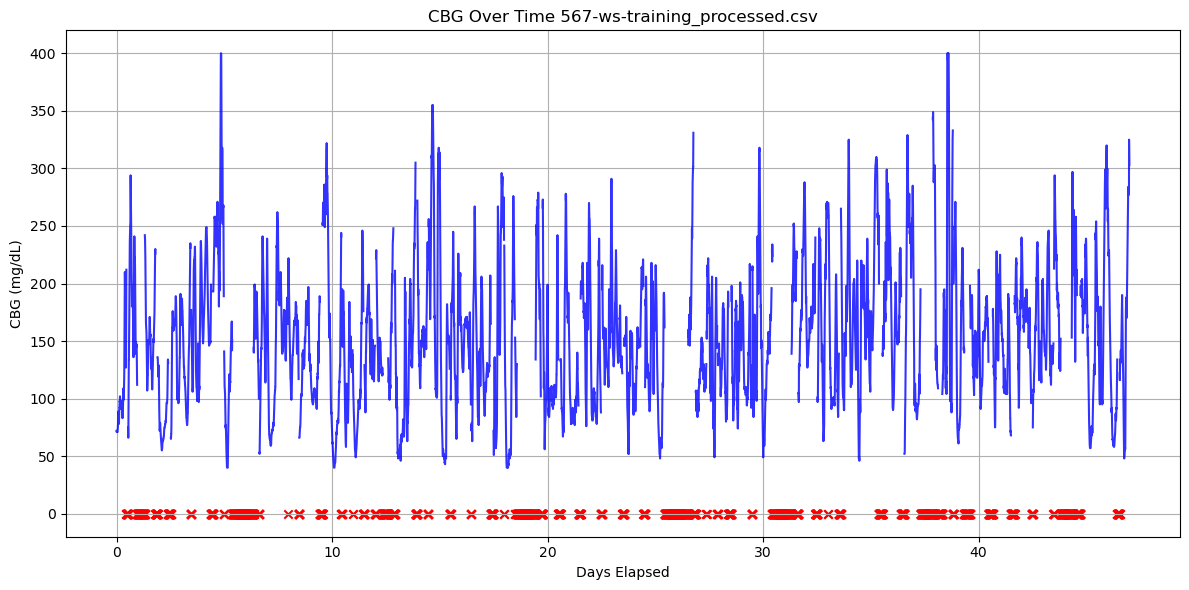

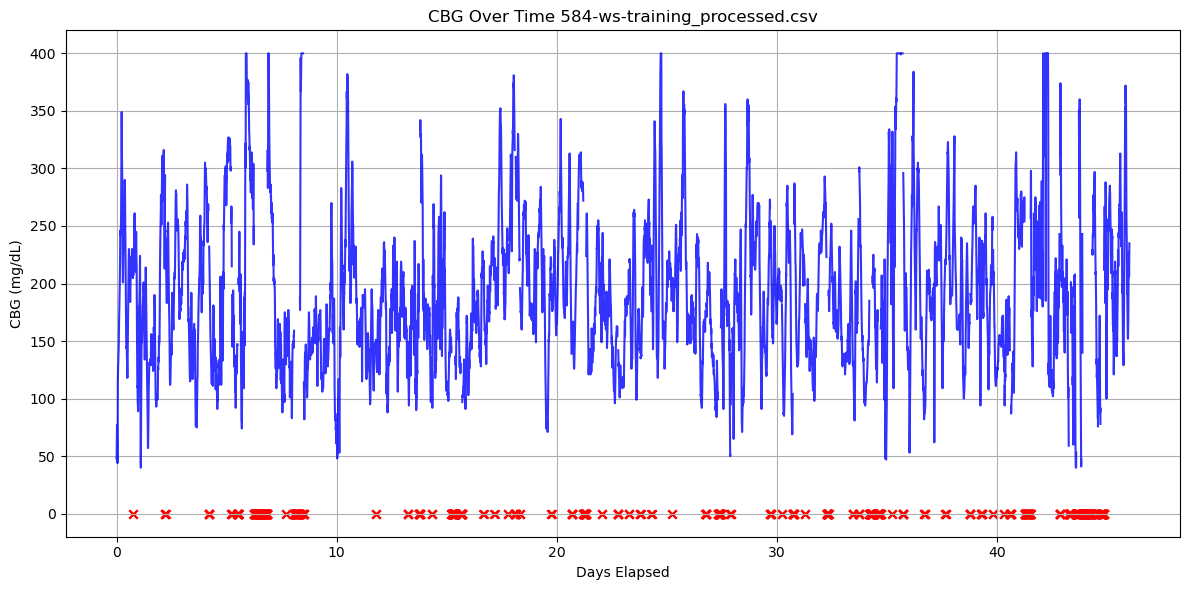

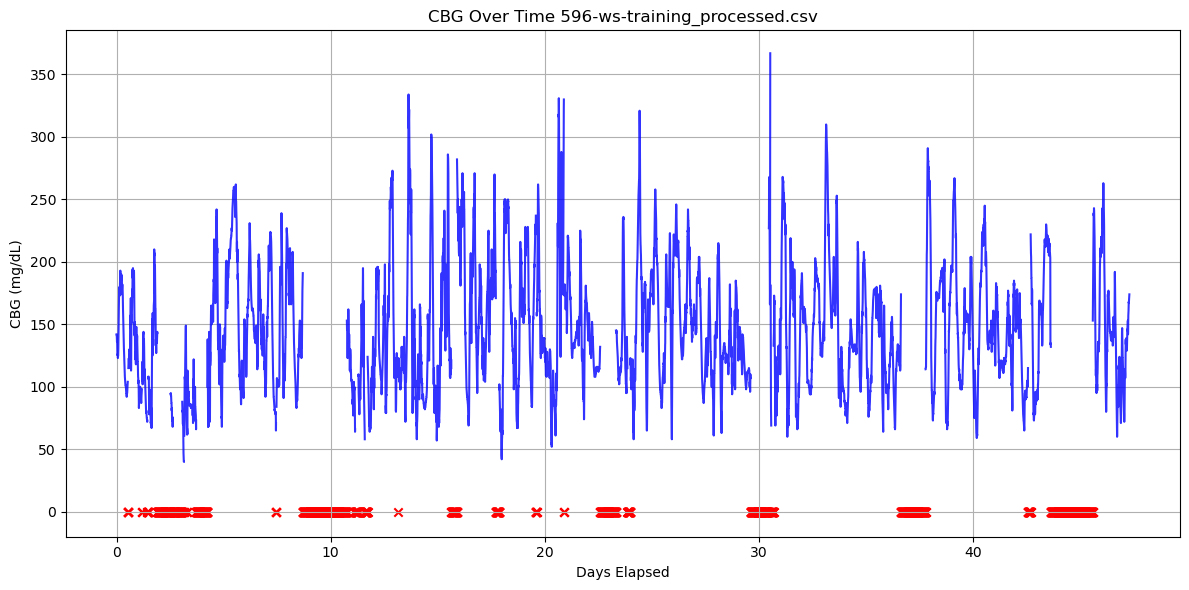

In [11]:
csv_files_2020.sort()
print("Plotting 2020 Training Files...")
plot_training_data(csv_files_2020, dataset_path_2020, year="2020")

In [12]:
test_dataset_path_2018 = '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test'
test_dataset_path_2020 = '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2020_processed/test'

test_csv_files_2018 = [f for f in os.listdir(test_dataset_path_2018) if f.endswith('.csv')]
test_csv_files_2020 = [f for f in os.listdir(test_dataset_path_2020) if f.endswith('.csv')]
test_csv_files = test_csv_files_2018 + test_csv_files_2020
test_csv_files.sort()
test_csv_files

['540-ws-testing_processed.csv',
 '544-ws-testing_processed.csv',
 '552-ws-testing_processed.csv',
 '559-ws-testing_processed.csv',
 '563-ws-testing_processed.csv',
 '567-ws-testing_processed.csv',
 '570-ws-testing_processed.csv',
 '575-ws-testing_processed.csv',
 '584-ws-testing_processed.csv',
 '588-ws-testing_processed.csv',
 '591-ws-testing_processed.csv',
 '596-ws-testing_processed.csv']

Plotting 2018 Test Files...


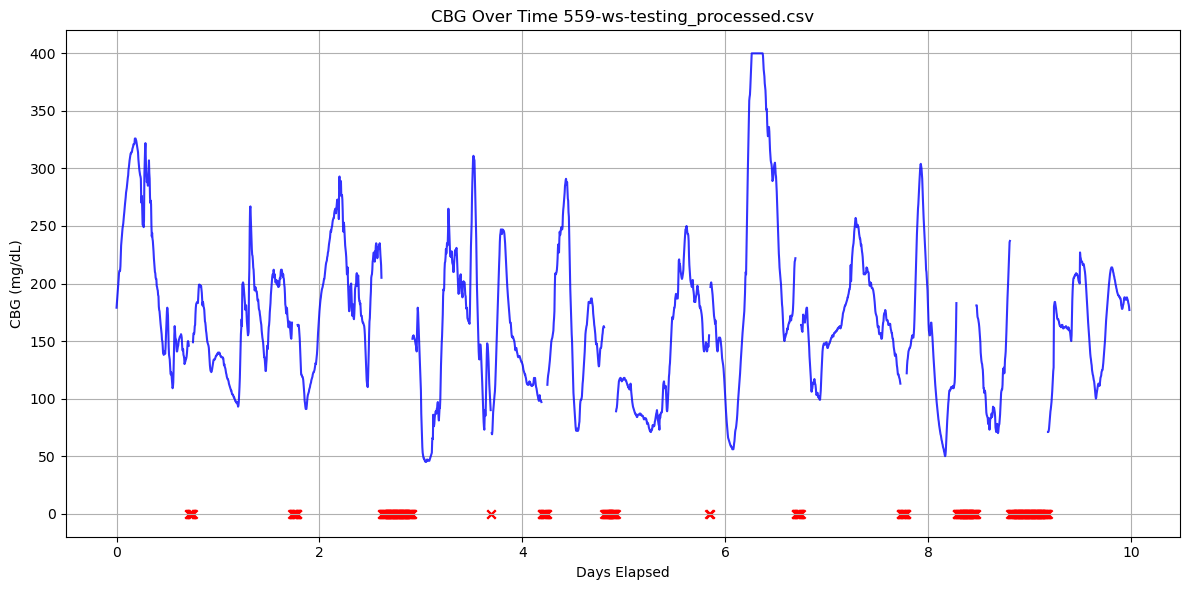

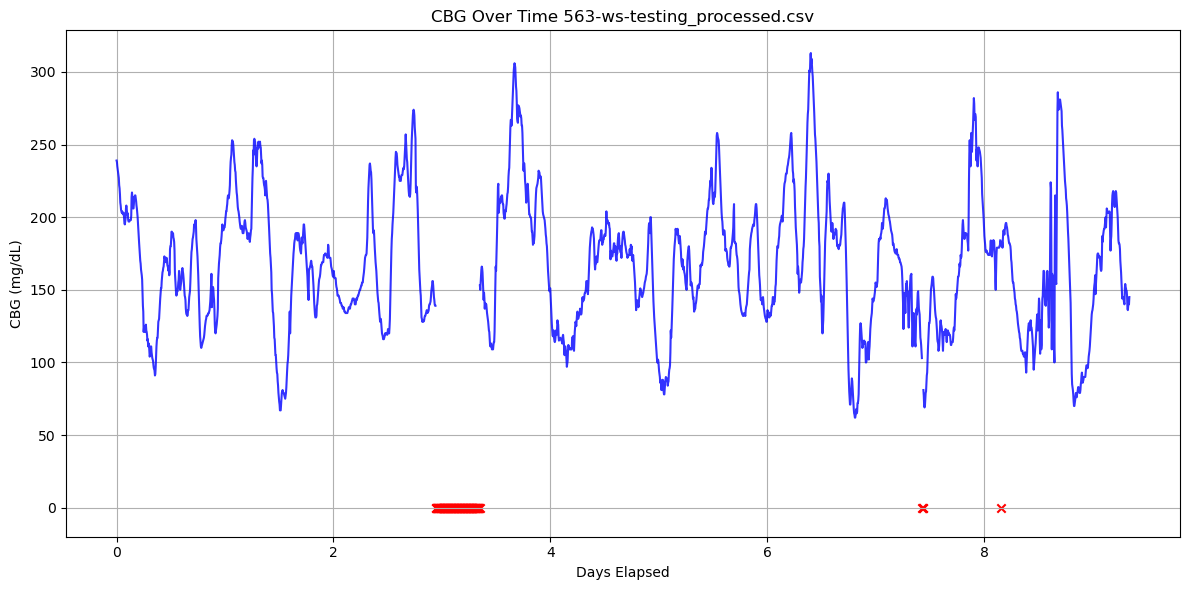

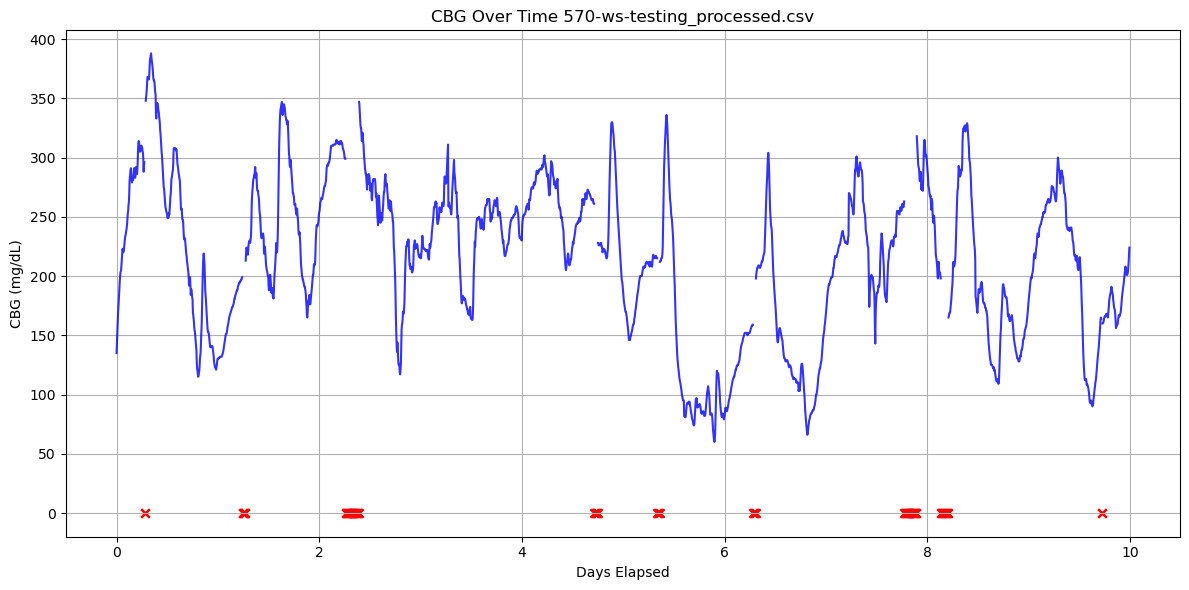

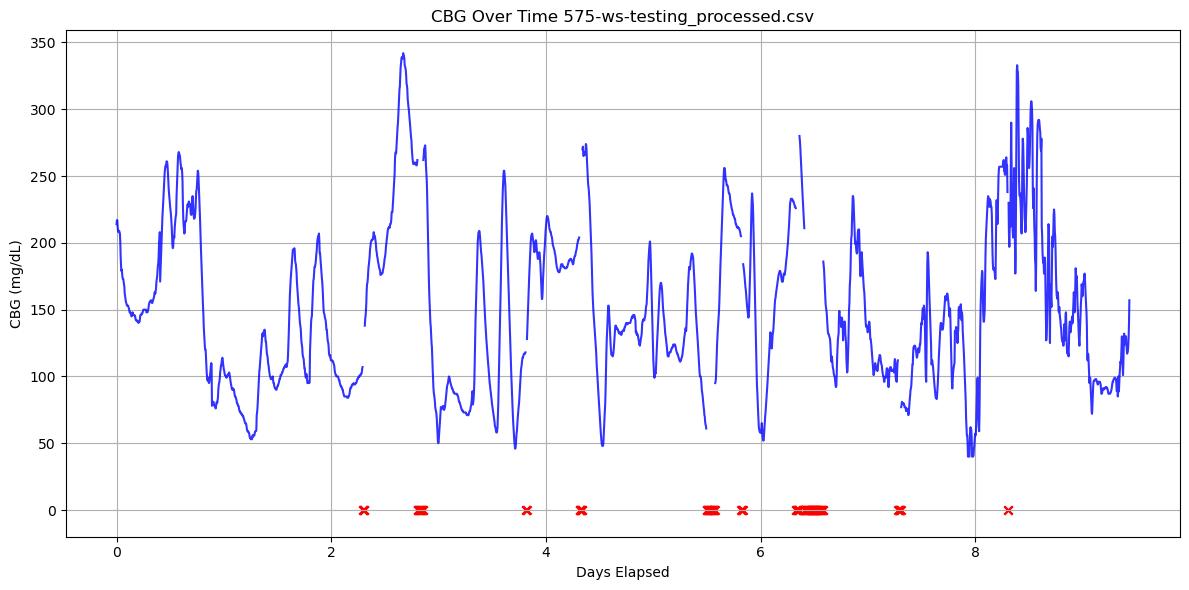

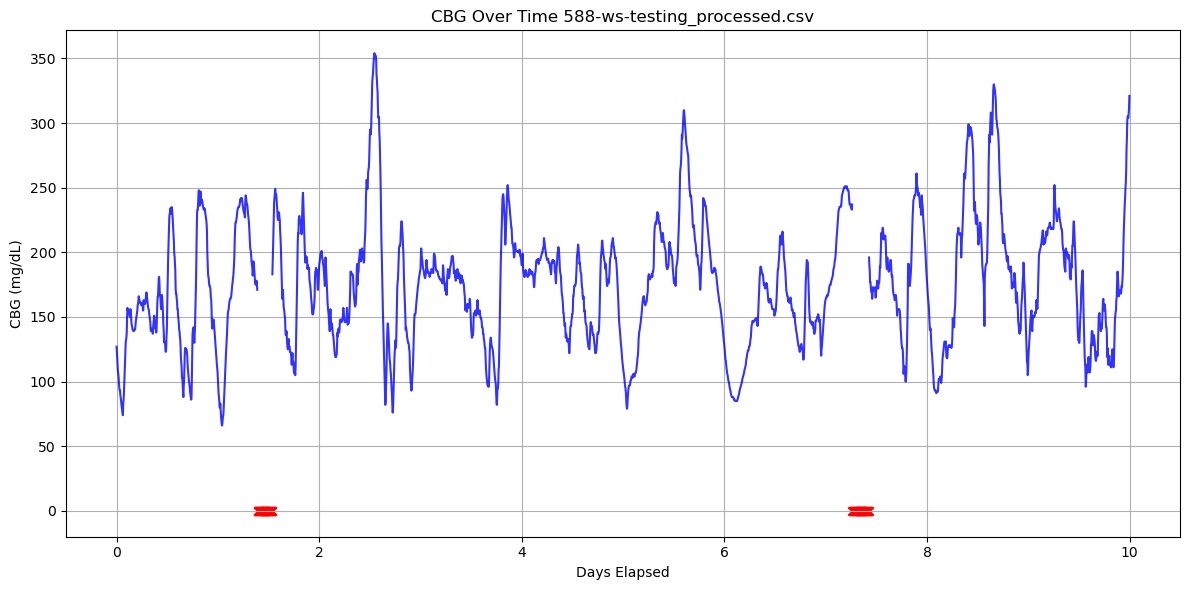

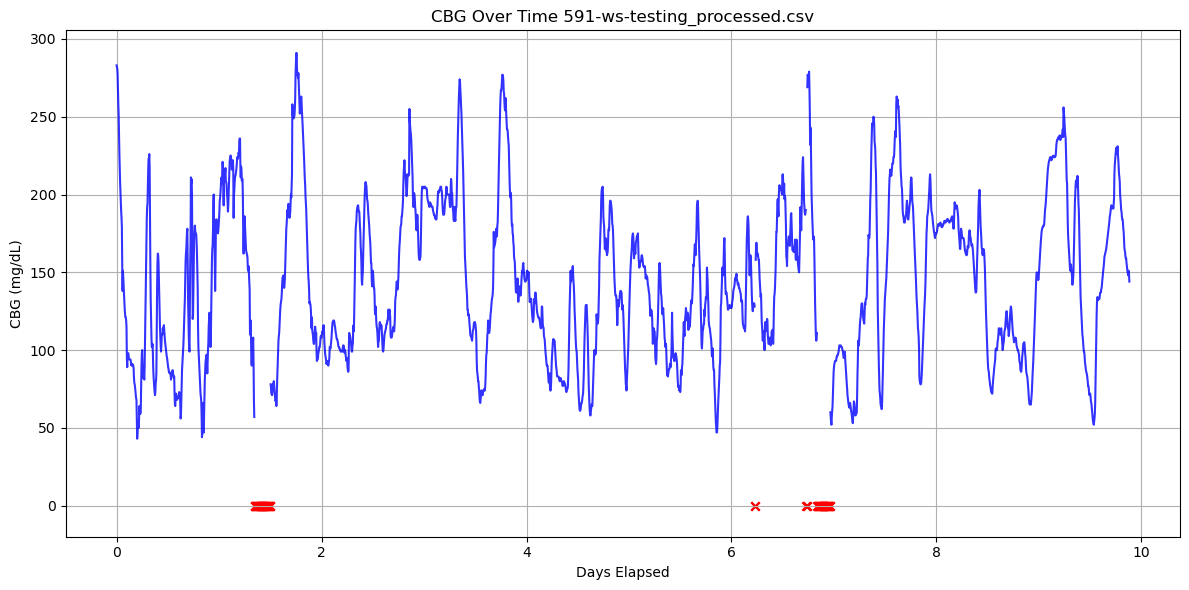

In [13]:
test_csv_files_2018.sort()
print("Plotting 2018 Test Files...")
plot_training_data(test_csv_files_2018, test_dataset_path_2018, year="2018")

Plotting 2020 Test Files...


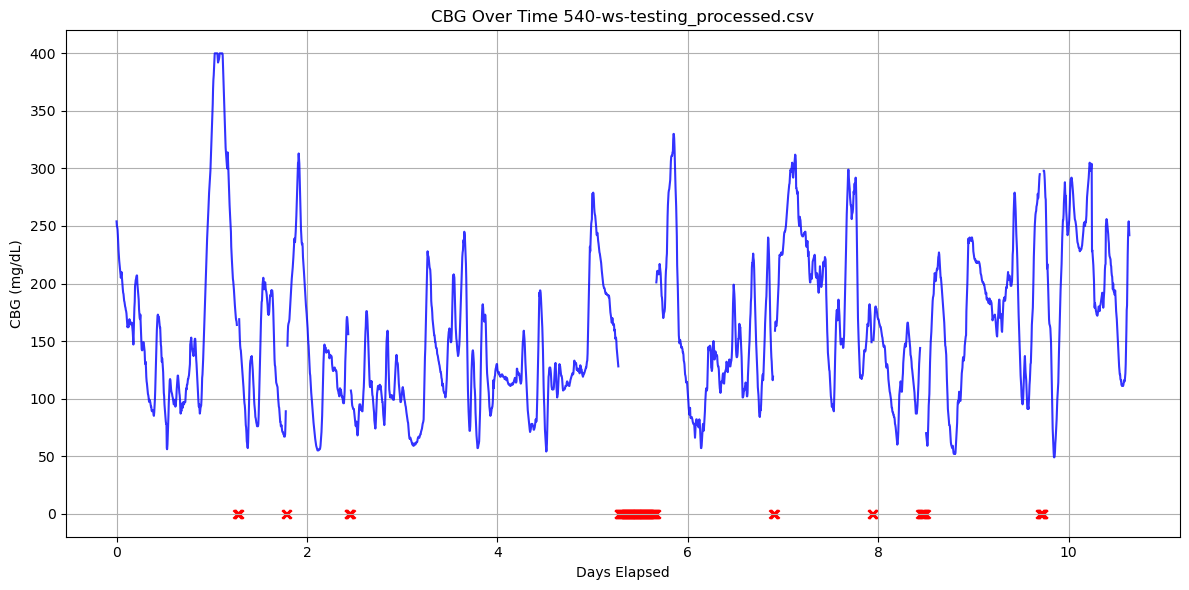

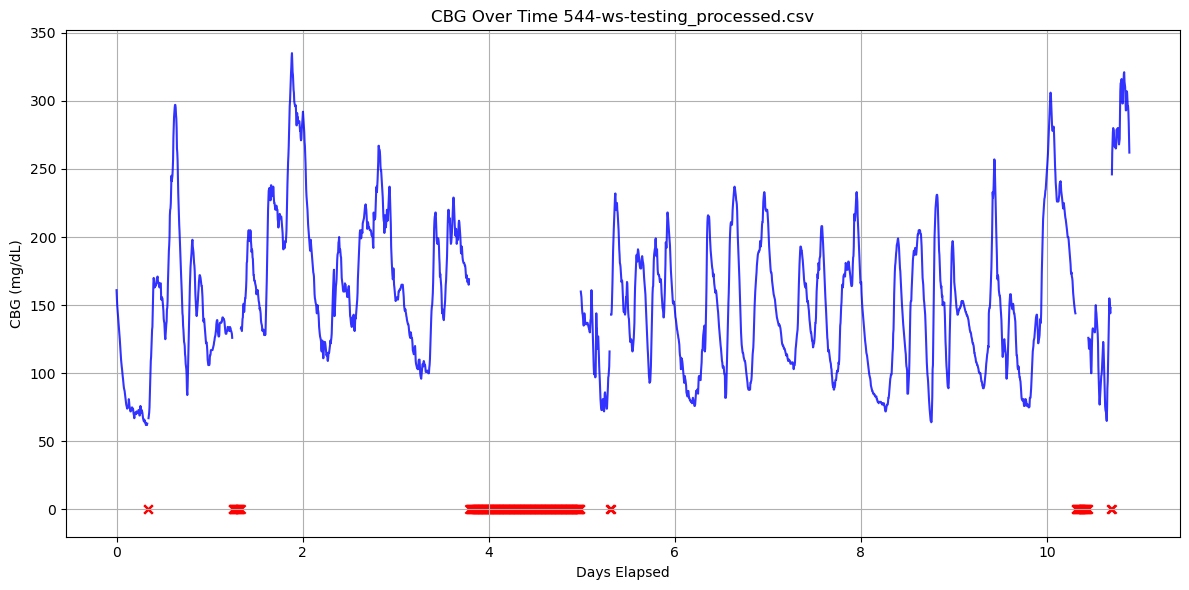

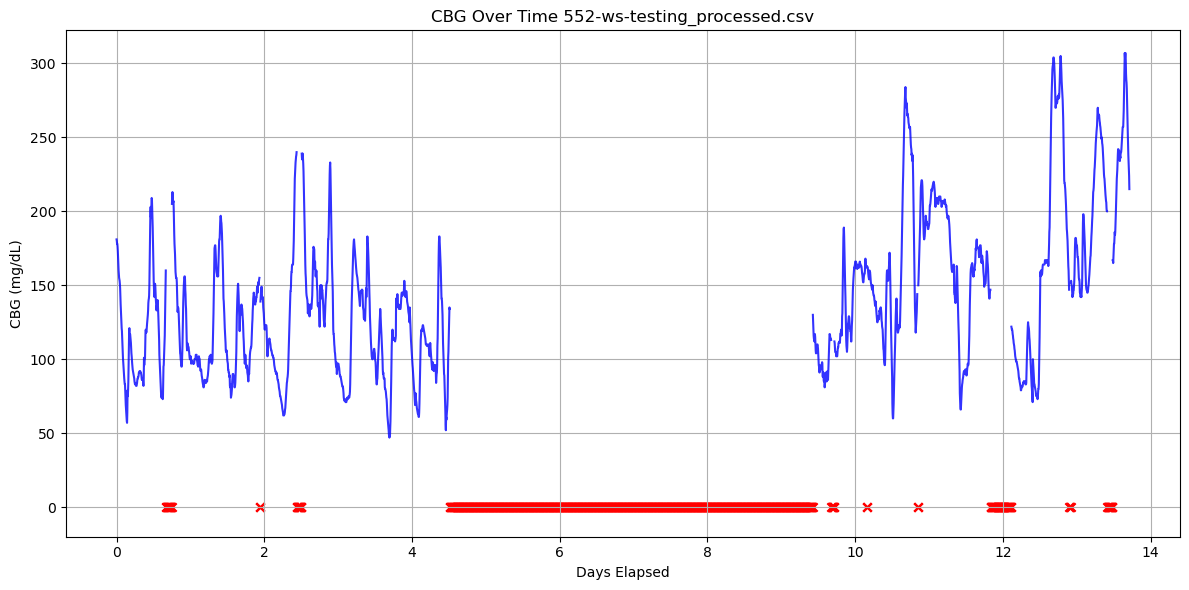

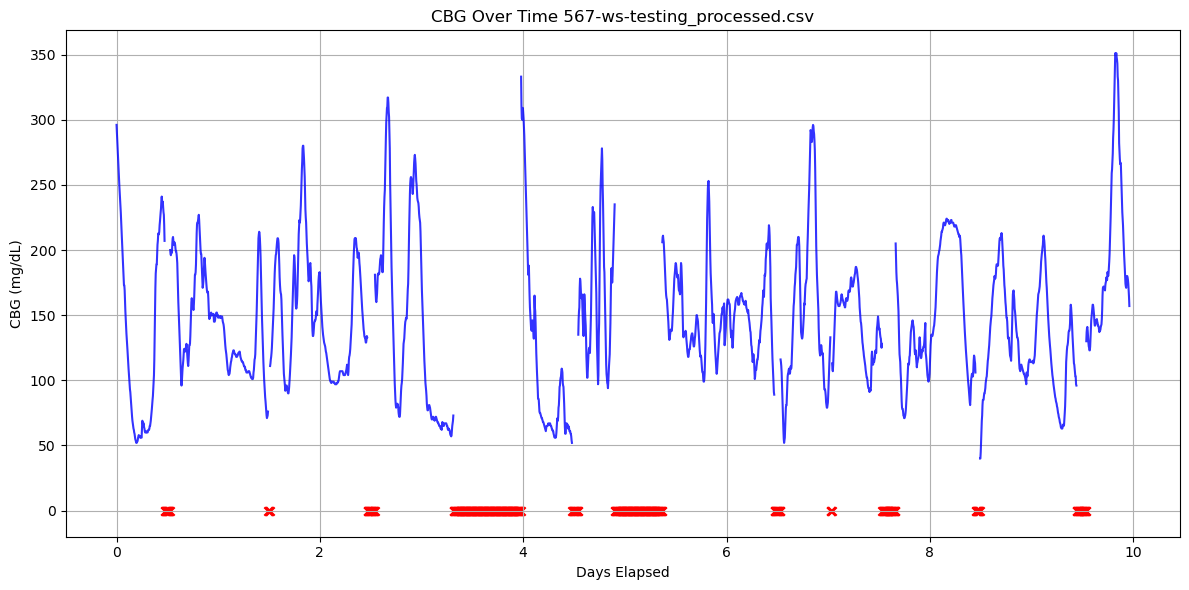

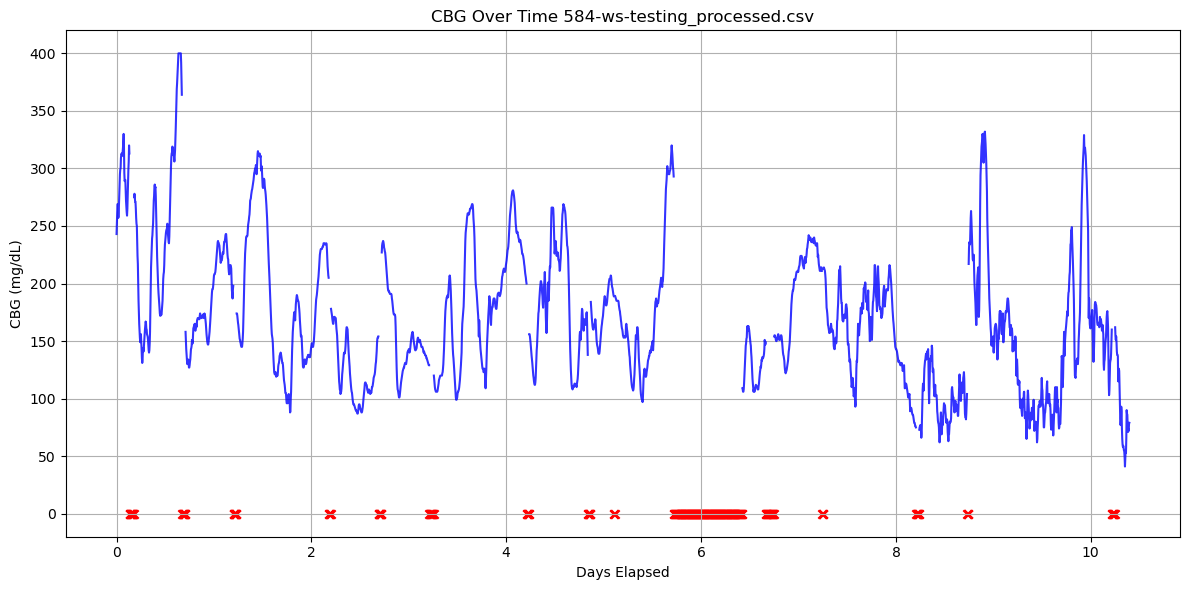

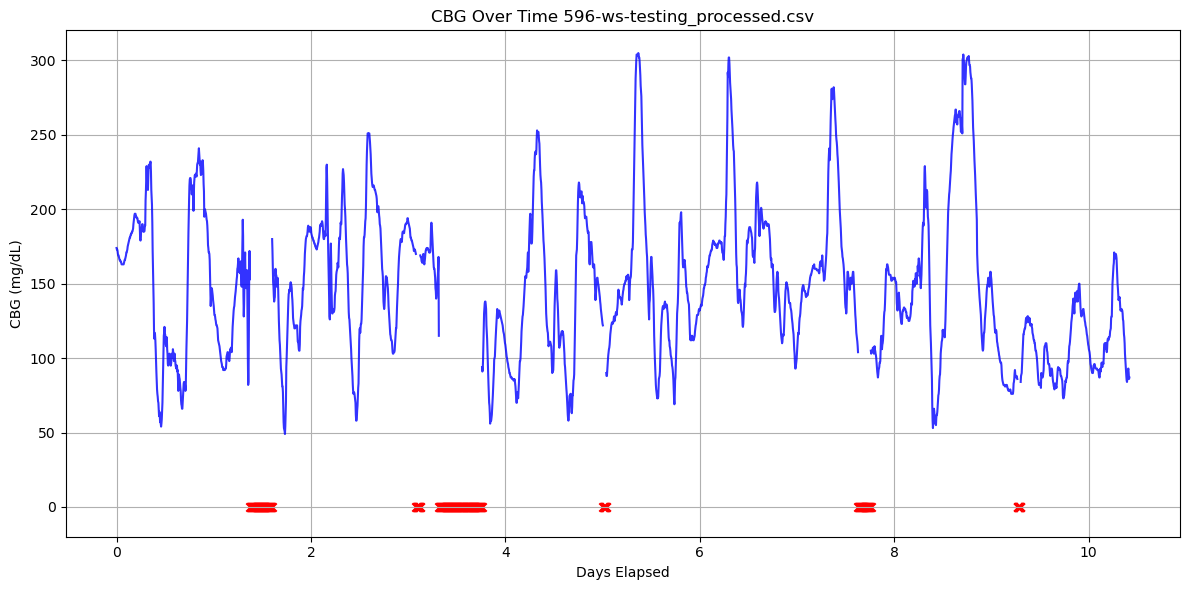

In [14]:
test_csv_files_2020.sort()
print("Plotting 2020 Test Files...")
plot_training_data(test_csv_files_2020, test_dataset_path_2020, year="2020")

In [15]:
# Combine all CSV files into one list
csv_files_2018_train = [os.path.join(dataset_path_2018, f) for f in os.listdir(dataset_path_2018) if f.endswith('.csv')]
csv_files_2020_train = [os.path.join(dataset_path_2020, f) for f in os.listdir(dataset_path_2020) if f.endswith('.csv')]
csv_files_2018_test = [os.path.join(test_dataset_path_2018, f) for f in os.listdir(test_dataset_path_2018) if f.endswith('.csv')]
csv_files_2020_test = [os.path.join(test_dataset_path_2020, f) for f in os.listdir(test_dataset_path_2020) if f.endswith('.csv')]

all_files = csv_files_2018_train + csv_files_2020_train + csv_files_2018_test + csv_files_2020_test
all_files.sort()
all_files

['/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/559-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/563-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/570-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/575-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/588-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/test/591-ws-testing_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/train/559-ws-training_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/train/563-ws-training_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_processed/train/570-ws-training_processed.csv',
 '/Users/heatherdifazio/Documents/DDDM/Ohio_Data/Ohio2018_

In [16]:
all_data = pd.concat([pd.read_csv(file) for file in all_files])
print(f"Total data size: {all_data.shape}")

Total data size: (188948, 9)


In [18]:
valid_data = all_data[all_data['missing_cbg'] == 0]
cbg_80th_percentile = np.percentile(valid_data['cbg'], 80)
print(f"80th Percentile of CBG: {cbg_80th_percentile}")

80th Percentile of CBG: 209.0


In [20]:
train_data = valid_data[valid_data['cbg'] <= cbg_80th_percentile]
test_data = valid_data[valid_data['cbg'] > cbg_80th_percentile]

print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")

Training data size: (133300, 9)
Testing data size: (33231, 9)
